<a href="https://colab.research.google.com/github/Shwetayadav003/OIBSIP/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Sales prediction

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape
(200, 5)

(200, 5)

In [7]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

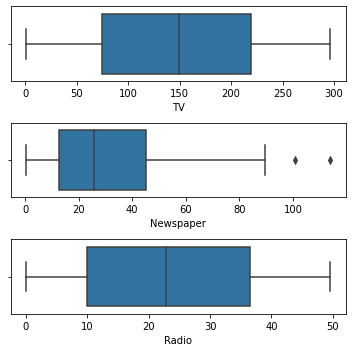

In [12]:
fig, axs = plt.subplots(3,figsize =(5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

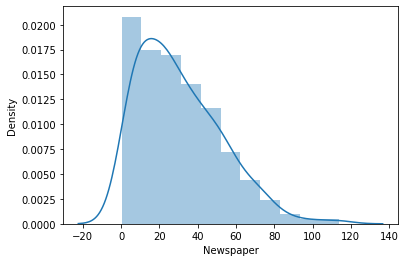

In [13]:
sns.distplot(df['Newspaper'])

In [58]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25) 

In [59]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)



-35.775000000000006
93.625


In [18]:
data = df.copy()

In [19]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

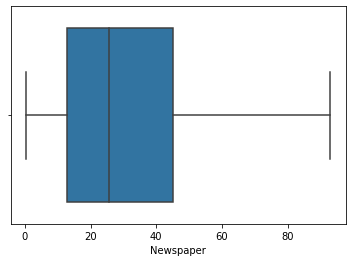

In [20]:
sns.boxplot(data['Newspaper'])

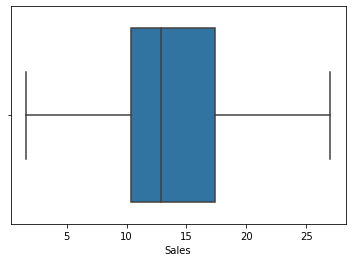

In [21]:
sns.boxplot(data['Sales']);

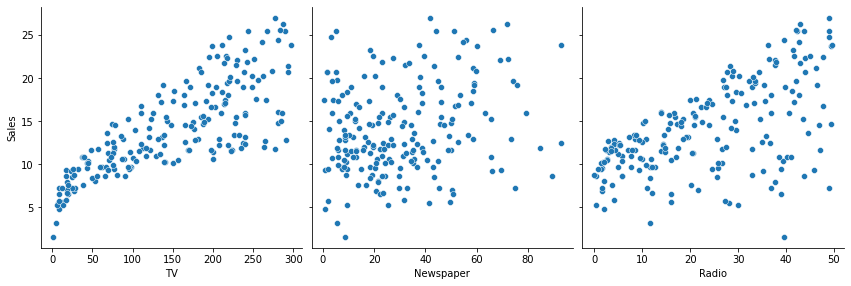

In [62]:
sns.pairplot(data, x_vars=['TV', 'Newspaper','Radio'],
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

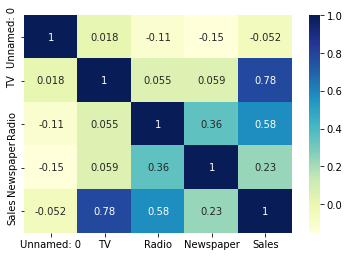

In [25]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot= True)
plt.show

In [26]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [28]:
print(important_features)

['TV', 'Radio', 'Sales']


In [29]:
X = data['TV']
y = data['Sales']

In [55]:
X=X.values.reshape(-1,1)

In [56]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [30]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [63]:
print(X.shape,y.shape)

(200, 1) (200,)


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [65]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [54]:
print(X_train.shape,y_train.shape)

(134,) (134,)


In [38]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [67]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [68]:
knn_train_pred = knn.predict(X_train)

In [69]:
knn_test_pred = knn.predict(X_test)

In [70]:
print(knn_train_pred, knn_test_pred)

[11.14 14.9  15.6  21.76  8.92 15.28 15.6   5.42 10.88 10.04 13.26 19.36
 11.7  17.58 15.54  4.68 14.92 13.22  9.3  11.52  6.18 11.04 10.48 16.3
 11.1   7.5  21.76 10.18 17.2  15.28 10.9  15.6   5.9  17.5   7.88 11.14
 21.06 14.08 13.8  14.78 11.1   7.88 15.28 15.48 10.88 15.9  17.48 15.
 13.9  16.36 16.7  17.5  16.38 14.44 13.26 19.36 14.26 14.78 14.18 18.66
  7.28 10.18 16.7   4.68 10.48 15.28 19.16  8.6   9.44 19.84 10.58 20.22
 15.6  17.58 19.16 11.1  21.76 17.2  15.6  17.78 19.84 11.52  6.96  9.44
 10.76 16.7   7.5  16.52 15.28 16.18 18.26 11.52 13.2  15.98 11.14 15.6
 19.48  8.96 19.84 18.66 14.86 19.84 11.52 18.44  5.42 11.44 18.86 17.48
 13.9   7.28 14.26 19.4  10.42 11.76 10.48 13.9  11.52 11.52 14.08 14.08
 21.06 18.86 19.84  6.96 17.5  14.18 15.6  16.18 19.4  14.72 17.5   6.18
 13.52 11.52] [21.06 15.48 16.9  11.52 11.7  10.9   6.96 15.6  14.78 13.2  18.06  5.42
 11.34 16.7  17.64 14.78 18.94 15.28  4.68 16.32 10.76 15.64 15.6  16.56
 12.24 17.5  11.52 14.44 13.74 10.9  11.1

In [71]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [76]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train -r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5453601173866678
RMSE: 3.5935489337692252


In [77]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.674229,0.54536,3.593549,0.128869


In [78]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [79]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [80]:
print(svr_train_pred,svr_test_pred)

[10.13769653 13.23043051 18.21924984 18.32778954  9.42183465 14.46201487
 15.5593583   7.2988075  11.89291959  9.79987545 13.13580754 17.25364174
 12.30018224 18.71305201 15.73236131  7.24918173 14.58820138 13.29964196
  9.25522028 10.58524667  7.37854039 10.47374733  8.29228618 15.84744344
 11.67321933  7.74371288 18.49002341 11.7445814  17.3487283  14.51568218
 11.58601168 18.24883273  7.30015026 16.21503002  7.88970133 10.08283126
 18.57517306 13.3617277  13.05195406 13.71166817 11.69713831  7.84214003
 14.6711141  14.93322736 11.9963568  15.18786369 16.61482697 16.50787048
 12.72197192 16.76623125 17.73514185 16.17573248 15.40014994 13.48670907
 13.11395612 17.24831598 14.99709708 13.87402261 14.77911897 18.63617246
  7.54807874 11.75871225 17.74940488  7.25677464  8.43197986 14.41335708
 16.83317247  8.02200253  8.93907533 18.74528545 11.24611158 17.0866706
 18.24150171 18.65866255 17.04848329 11.41146648 18.30398001 17.32246787
 18.1462804  18.74607969 18.7732361  10.64334023  7.

In [82]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train -r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5877168027338593
RMSE: 3.422059963819253


In [83]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.674229,0.545360,3.593549,0.128869
1,K-Nearest Neighbors,0.604146,0.587717,3.422060,0.016429
2,Support Vector Machine,0.604146,0.587717,3.422060,0.016429


In [84]:
import statsmodels.api as sm

In [85]:
X_train_constant = sm.add_constant(X_train)

In [86]:
model = sm.OLS(y_train, X_train_constant).fit()

In [87]:
model.params

const    6.791654
x1       0.048972
dtype: float64

In [88]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     213.4
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           2.36e-29
Time:                        18:20:02   Log-Likelihood:                -345.10
No. Observations:                 134   AIC:                             694.2
Df Residuals:                     132   BIC:                             700.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7917      0.566     11.996      0.0

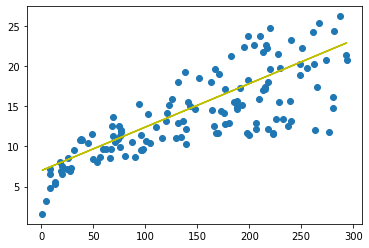

In [89]:
plt.scatter(X_train, y_train)
plt.plot(X_train,6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [90]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

16     2.388026
90    -2.168630
62    -2.810719
30     0.264367
182   -0.843896
         ...   
110   -4.449594
55     7.167761
108   -2.133191
26     1.210208
115    2.130528
Name: Sales, Length: 134, dtype: float64

In [ ]:
plt.scatter

In [91]:
(X_train, res)
plt.show()

In [92]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [93]:
y_pred

array([19.22081724, 15.36669916, 18.27565232, 10.17074072, 12.16880957,
        8.89746156,  7.61928517, 18.41767192, 14.12280336, 12.5312044 ,
       16.27758348,  7.20302083, 10.44988269, 18.06017431, 16.70853951,
       14.12770059, 17.4529181 , 14.78882631,  7.056104  , 17.91815471,
       10.62128566, 14.46071206, 18.45684974, 17.76144343, 12.32062362,
       16.46857536, 10.53313556, 13.66246397, 13.41270536,  8.90235879,
       11.18446683,  8.1041107 , 21.30703618,  7.36462934,  8.66239464,
        7.95719387,  8.04534397, 21.02789421, 18.53520538, 17.59004047,
       13.61349169, 20.71447165,  9.60755956, 11.11590564, 17.11011217,
        7.63397685, 18.70171112, 10.98857773,  7.63397685, 12.71729905,
        7.70743526, 12.21288461, 15.84662746, 18.54989707,  7.14915132,
       20.79772451, 11.40484207, 16.78689515,  8.98071443, 20.35207681,
       16.57631436, 20.68019105, 19.77910118, 20.97892193, 12.0512761 ,
       18.62825271])

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [95]:
np.sqrt(mean_squared_error(y_test , y_pred))

3.375237508553713

In [97]:
r2 = r2_score(y_test, y_pred)
r2

0.5989217770313786

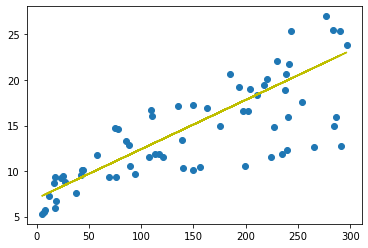

In [98]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()